### Lab 2: Ice-Albedo Feedback

Due Tuesday 1/30 at 5 pm

#### Warmup

Return the sum of two given integers (`a` and `b`) unless the two integers are equal. In that case, return double their sum.

In [1]:
def sum_double(a, b):
    if a==b:
        return 2*(a+b) 
    return (a+b)
    # No else block necessary, because we'll only reach second return if a does not equal b

# tests of function
print(sum_double(2, 3)) # should print 5
print(sum_double(3, 3)) # should print 12
print(sum_double(4, 5)) # should print 9

5
12
9


#### Tips and Tricks

- shift + enter to run cells (including markdown)
- use cmd (Mac) or ctrl (Windows) to select multiple parts of code
- restart kernel and clear all -- cleans out the junk
- Jupyter dark mode (Settings > Theme)
- 'comment out' using cmd/ctrl + / 
- bulk indent using cmd/ctrl + square bracket
- View > Show Line Numbers
- "$\degrees$C"= degrees C

#### Calculating albedo as a function of temperature

Using the equation below, create a plot of albedo as a function of temperature from 250 to 300 K. 

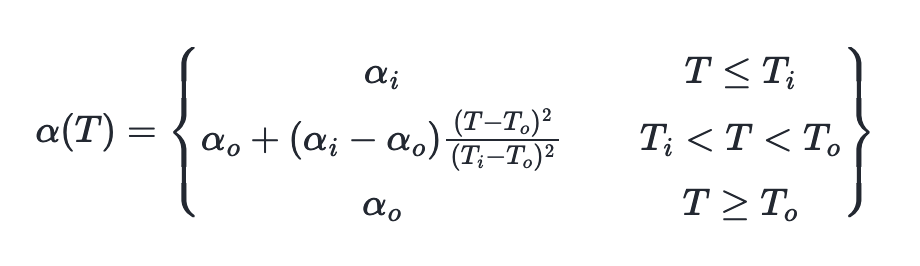

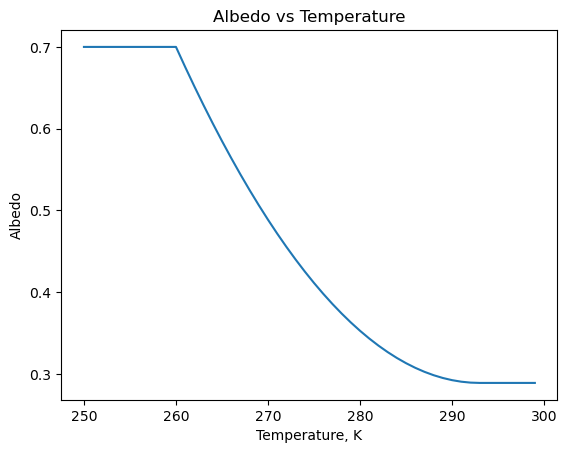

In [2]:
import matplotlib.pyplot as plt

# initialize variables (your code here)
A_i= 0.7  # Full ice coverage
A_0= 0.289  # Lowest realistic albedo (No ice)

T_i= 260  # Transition to Snowball Earth
T_0= 293  # Transition to ice-free Earth


def calc_A(T): # function to calculate A given T
    if T<=T_i:
        return A_i
    elif T>=T_0:
        return A_0
    else:
        return A_0 + (A_i - A_0) * ((T-T_0)**2/(T_i-T_0)**2)
    
T_list = list(range(250,300)) # K; make list of temperatures
A_list = [] # Empty list to hold corresponding albedos



for T in T_list:  # Iterate through temps
    A_list.append(calc_A(T))  # Calculate albedo and append to list
    
plt.plot(T_list, A_list)  # Plot albedo vs temperature
plt.xlabel("Temperature, K")
plt.ylabel("Albedo")
plt.title("Albedo vs Temperature")
plt.show()
    


### Short answer

1. Why does albedo change as a function of temperature?

#### Incorporate ice-albedo feedback into our model of equilibrium temperature

1. Find solar flux during Snowball Earth events (let's say 700 Ma; you will need to go back to Lab 1). 
2. Create a model that calculates Earth's equilibrium temperature including the ice-albedo feedback. 
    - You will need to run this model many times to reach an equilibrium temperature (50 iterations is a good place to start)
3. Run this model for a range of greenhouse gas concentrations (i.e., from gh_eff = 32 to 37)
4. Create a plot that shows Earth's equilibrium temperature for each of these model runs.

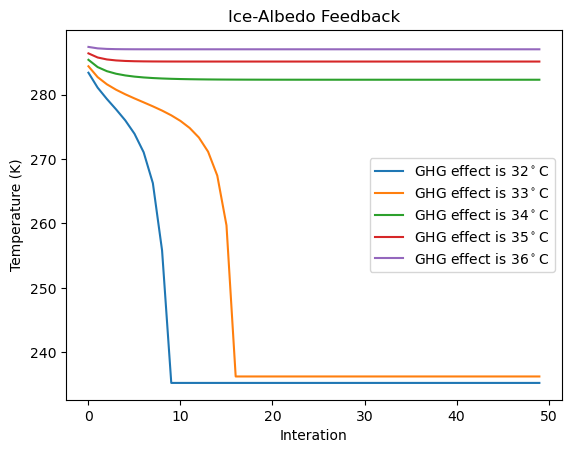

In [102]:
import numpy as np

# we can re-use our model from earlier labs:

t0 = 4.57e9 # years
#t =list(range(0, 4570000000, 10000000)) # in years
S0 = 1370 # present solar luminosity, W/m^2
A = 0.3 # Albedo
sig = 5.67e-8 # W/m^2/K^4 Stefan-Boltzmann constant
#gh_eff = 33 # C; present greenhouse effect
year=4.57e9 - 700000000 ## IS THIS YEARS AGO OR YEARS FROM EARTH BORN

def calc_Solar_Flux(t, t0):
    return (S0/(1+(2/5)*(1-(t/t0))))
Sf=calc_Solar_Flux(year,t0)
#print(Sf)

def calc_T_equil(A, S, sig, gh_eff): # calculate Earth's equilibrium temperature
    return np.power(((S/4)*(1-A))/sig, (1/4)) + gh_eff

Sf=calc_Solar_Flux(year,t0)
T = 288  # K; initial temperature
T_list = []
#T = calc_T_equil(A, Sf, sig, gh_eff)
t = list(range(50)) # timesteps to bring model to equilibrium
gh_eff=list(range(32,37,1))
L2 = []

for i in gh_eff:
    T_list = []
    ghg = i
    T = 288  # K; initial temperature
    A = calc_A(T)
    for step in t: 
        T = calc_T_equil(A, Sf, sig, ghg)
        A = calc_A(T)  # Calculate temporary albedo at temp T
        T_list.append(T)
        
        
        #plt.plot(t, T_list)
        #plt.xlabel("Interation")
        #plt.ylabel("Temperature (K)")
        #plt.title("Ice-Albedo Feedback")
        #plt.show()
    #print(f' new list')
    #print(T_list)
    L2.append(T_list)

for i in gh_eff:
    z =i-32
    plt.plot(t, L2[z],label = f'GHG effect is {z+32}$^\circ$C')

plt.xlabel("Interation")
plt.ylabel("Temperature (K)")
plt.title("Ice-Albedo Feedback")
plt.legend()
plt.show()



### Short Answers

1. How does Earth's equilibrium temperature differ when the ice-albedo feedback is added to our model?
2. How does this relate to the Snowball Earth events?
3. Would you expect Earth's GHG concentration to be higher or lower than present before and after the snowballs?
4. What assumptions does the model you created make?